## Markov Chain Model for Machine Breakdown and Repair

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import binom

# Total number of machines
N = 3

def transition_matrix(p):
    # State space: 0 to N (inclusive)
    states = list(range(N + 1))
    P = np.zeros((N + 1, N + 1))

    for i in states:  # Current number of working machines
        for k in range(i + 1):  # Number of machines that break down
            prob = binom.pmf(k, i, p)  # P(k breakdowns out of i)
            if k == 0:
                j = i  # No repair needed
            else:
                j = i - k + 1  # One of the broken machines is repaired
            j = min(j, N)  # Cap at maximum number of machines
            P[i][j] += prob

    # Create a DataFrame for easier viewing
    df = pd.DataFrame(P, index=[f"From {i}" for i in states], columns=[f"To {j}" for j in states])
    return df

# Example usage:
p_sample = 0.3  # Set breakdown probability
transition_df = transition_matrix(p_sample)

# Display the transition matrix
print("Transition Matrix (p = 0.3):")
print(transition_df)

Transition Matrix (p = 0.3):
        To 0   To 1   To 2   To 3
From 0   1.0  0.000  0.000  0.000
From 1   0.0  1.000  0.000  0.000
From 2   0.0  0.090  0.910  0.000
From 3   0.0  0.027  0.189  0.784


## Graph Visualization

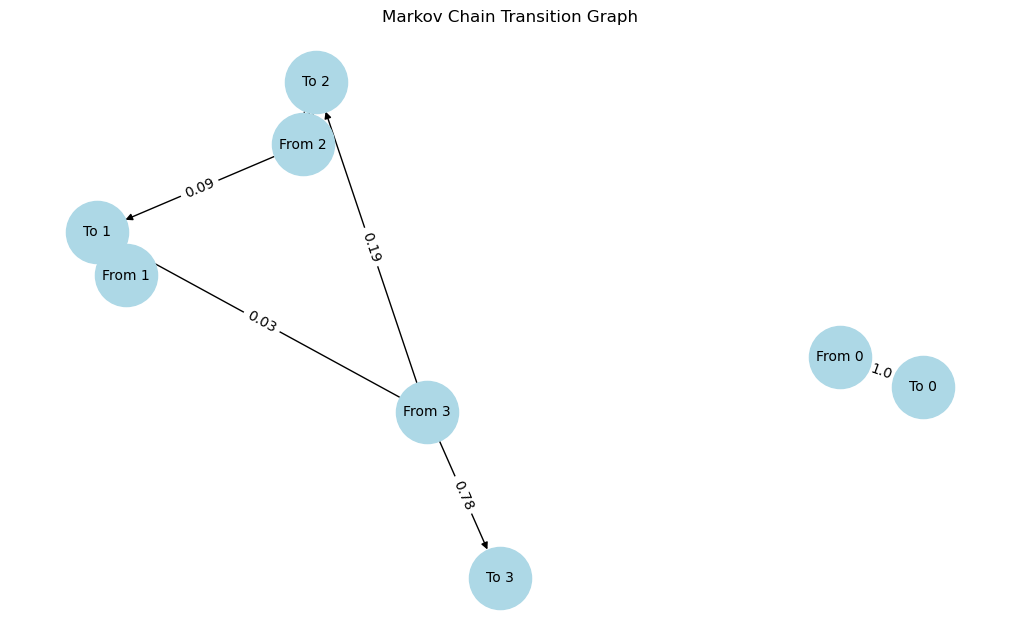

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_markov_chain(transition_df):
    G = nx.DiGraph()

    # Add edges with weights (probabilities)
    for from_state in transition_df.index:
        for to_state in transition_df.columns:
            prob = transition_df.loc[from_state, to_state]
            if prob > 0:
                G.add_edge(from_state, to_state, weight=round(prob, 2))

    pos = nx.spring_layout(G, seed=42)  # Positions for nodes

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrows=True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Markov Chain Transition Graph")
    plt.show()

# Call this after creating `transition_df` from earlier code
plot_markov_chain(transition_df)
